## Importation des données

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import nltk
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/ctripie/Documents/OPC/Projet 5/QueryResults.csv")
data.head(10)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,How to make a <button> in Bootstrap look like ...,<p>I'm working in (formerly Twitter) Bootstrap...,<html><css><twitter-bootstrap>,19981949,124,160740,0.0,8
1,How do i exit a List<string>.ForEach loop when...,<p>In a normal loop you can break out of a loo...,<c#><loops><delegates>,557159,51,73947,0.0,12
2,NULL vs nil in Objective-C,<p>In <code>observeValueForKeyPath:ofObject:ch...,<objective-c><cocoa><null>,557582,191,97079,0.0,5
3,Dependency Injection vs Factory Pattern,<p>Most of the examples quoted for usage of De...,<dependency-injection><factory-pattern><design...,557742,573,217770,0.0,30
4,How do I add an existing Solution to GitHub fr...,<p>I have looked through many web pages on the...,<git><github><visual-studio-2013>,19982053,214,158522,0.0,9
5,"Java IO implementation of unix/linux ""tail -f""",<p>I'm wondering what techniques and/or librar...,<java><file><file-io><iostream><tail>,557844,76,81370,0.0,9
6,php: convert milliseconds to date,"<p>I Have a string that is equal to a date, re...",<php><datetime><time>,557959,64,123466,0.0,6
7,"What is a ""static"" function in C?","<p>The question was about plain <a href=""/ques...",<c><function><static><terminology>,558122,656,704244,0.0,11
8,How does the stack work in assembly language?,<p>I'm currently trying to understand how the ...,<assembly><stack><callstack><stack-memory>,556714,100,162743,0.0,17
9,ember.js + handlebars: render vs outlet vs par...,<p>There are scattered explainations of each a...,<javascript><ember.js><handlebars.js>,19982257,56,16081,0.0,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          50000 non-null  object 
 1   Body           50000 non-null  object 
 2   Tags           50000 non-null  object 
 3   Id             50000 non-null  int64  
 4   Score          50000 non-null  int64  
 5   ViewCount      50000 non-null  int64  
 6   FavoriteCount  49969 non-null  float64
 7   AnswerCount    50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


## Data Cleaning

### Tags

In [4]:
data['Tags'].head(3)

0    <html><css><twitter-bootstrap>
1            <c#><loops><delegates>
2        <objective-c><cocoa><null>
Name: Tags, dtype: object

In [5]:
# Replace open and close balise between tags
data['Tags'] = data['Tags'].str.translate(str.maketrans({'<': '', '>': ','}))
# Delete last "," for each row
data['Tags'] = data['Tags'].str[:-1]

In [6]:
data['Tags'].head(3)

0    html,css,twitter-bootstrap
1            c#,loops,delegates
2        objective-c,cocoa,null
Name: Tags, dtype: object

### Body & Titles 

In [7]:
print (data['Title'][0])

How to make a <button> in Bootstrap look like a normal link in nav-tabs?


In [8]:
print (data['Body'][0])

<p>I'm working in (formerly Twitter) Bootstrap 2 and I wanted to style buttons as though they were normal links. Not just any normal links, though; these are going in a <code>&lt;ul class="nav nav-tabs nav-stacked"&gt;</code> container. The markup will end up like this:</p>

<pre><code>&lt;form action="..." method="post"&gt;
  &lt;div class="row-fluid"&gt;
    &lt;!-- Navigation for the form --&gt;
    &lt;div class="span3"&gt;
      &lt;ul class="nav nav-tabs nav-stacked"&gt;
        &lt;li&gt;&lt;button type="submit" name="op" value="Link 1"&gt;Link 1&lt;/button&gt;&lt;/li&gt;
        &lt;li&gt;&lt;button type="submit" name="op" value="Link 2"&gt;Link 2&lt;/button&gt;&lt;/li&gt;
        &lt;!-- ... --&gt;
      &lt;/ul&gt;
    &lt;/div&gt;
    &lt;!-- The actual form --&gt;
    &lt;div class="span9"&gt;
      &lt;!-- ... --&gt;
    &lt;/div&gt;
  &lt;/div&gt;
&lt;/form&gt;
</code></pre>

<p>Does Bootstrap have any way to make these <code>&lt;button&gt;</code>s look like they were act

In [9]:
def remove_code(x):
    soup = BeautifulSoup(x,"lxml")
    code_to_remove = soup.findAll("code")
    for code in code_to_remove:
        code.replace_with("")
    return str(soup)

In [10]:
#delete <code>
data['Body'] = data['Body'].apply(remove_code)
#delete html tags
data['Body'] = [BeautifulSoup(text,"lxml").get_text() for text in data['Body']]

In [11]:
print (data['Body'][0])

I'm working in (formerly Twitter) Bootstrap 2 and I wanted to style buttons as though they were normal links. Not just any normal links, though; these are going in a  container. The markup will end up like this:

Does Bootstrap have any way to make these s look like they were actually s?



In [12]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
words = set(nltk.corpus.words.words())

def sentence_cleaner(listofSentence):
    preprocess_list = []
    for sentence in listofSentence :
        
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

        tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

        words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]

        words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)

        sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())

        preprocess_list.append(sentence_clean)

    return preprocess_list

In [13]:
body_clean = sentence_cleaner(data['Body'])
data['Body_cleaned']=body_clean

In [14]:
print (data['Body_cleaned'][0])

working formerly twitter bootstrap style button though normal link normal link though going container markup end like bootstrap way make look like actually


In [15]:
title_clean = sentence_cleaner(data['Title'])
data['Title_cleaned']=title_clean

In [16]:
print (data['Title_cleaned'][0])

make button bootstrap look like normal link


## Data Exploration

In [17]:
def count_split_tags(df, column, separator):
    list_words = []
    for word in df[column].str.split(separator):
        list_words.extend(word)
    df_list_words = pd.DataFrame(list_words, columns=["Tag"])
    df_list_words = df_list_words.groupby("Tag")\
        .agg(tag_count=pd.NamedAgg(column="Tag", aggfunc="count"))
    df_list_words.sort_values("tag_count", ascending=False, inplace=True)
    return df_list_words

In [18]:
tags_list = count_split_tags(df=data, column='Tags', separator=',')
print("Le jeu de données compte {} tags.".format(tags_list.shape[0]))

Le jeu de données compte 12183 tags.


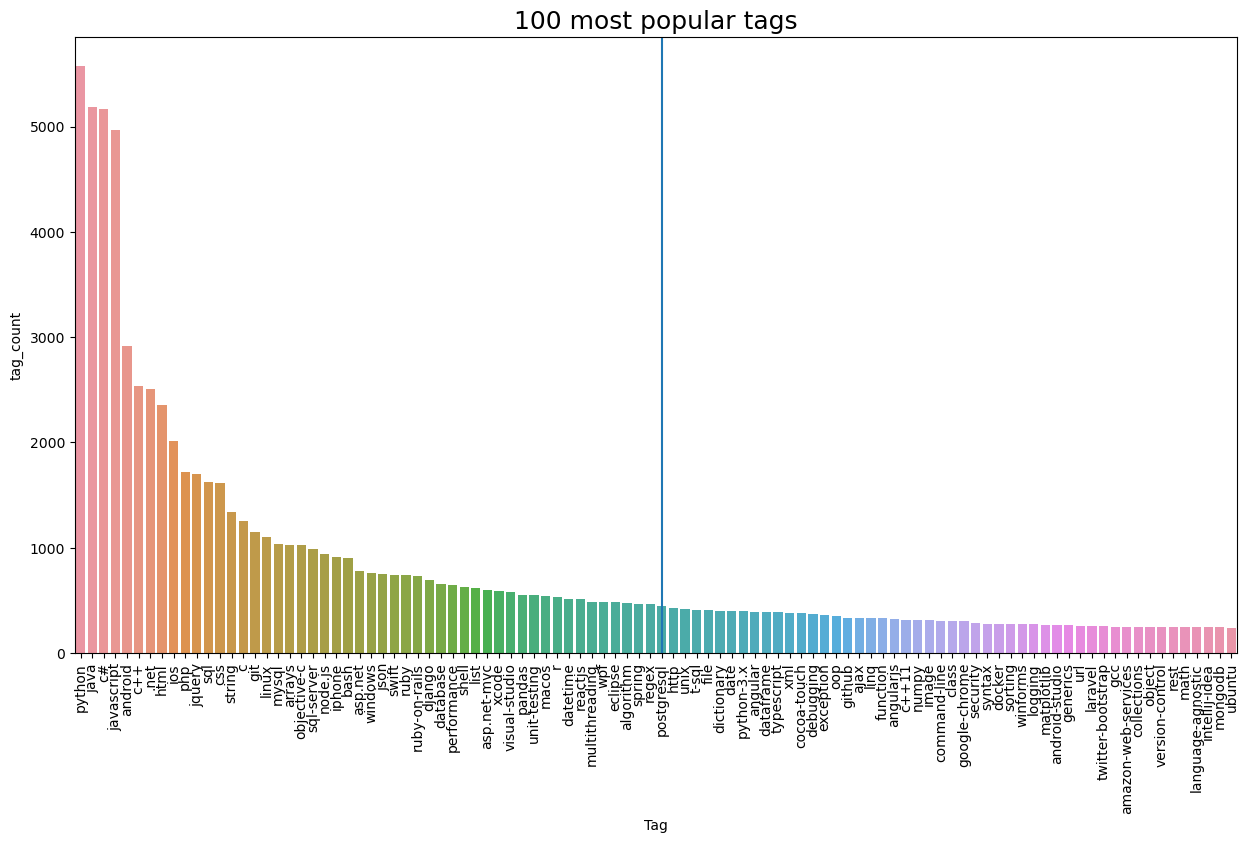

In [19]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=tags_list.iloc[0:100, :],
            x=tags_list.iloc[0:100, :].index,
            y="tag_count")
plt.axvline(x=50)
plt.xticks(rotation=90)
plt.title("100 most popular tags",
          fontsize=18)
plt.show()

In [20]:
top_tags = list(tags_list.iloc[0:50].index)
print(top_tags)

['python', 'java', 'c#', 'javascript', 'android', 'c++', '.net', 'html', 'ios', 'php', 'jquery', 'sql', 'css', 'string', 'c', 'git', 'linux', 'mysql', 'arrays', 'objective-c', 'sql-server', 'node.js', 'iphone', 'bash', 'asp.net', 'windows', 'json', 'swift', 'ruby', 'ruby-on-rails', 'django', 'database', 'performance', 'shell', 'list', 'asp.net-mvc', 'xcode', 'visual-studio', 'pandas', 'unit-testing', 'macos', 'r', 'datetime', 'reactjs', 'multithreading', 'wpf', 'eclipse', 'algorithm', 'spring', 'regex']


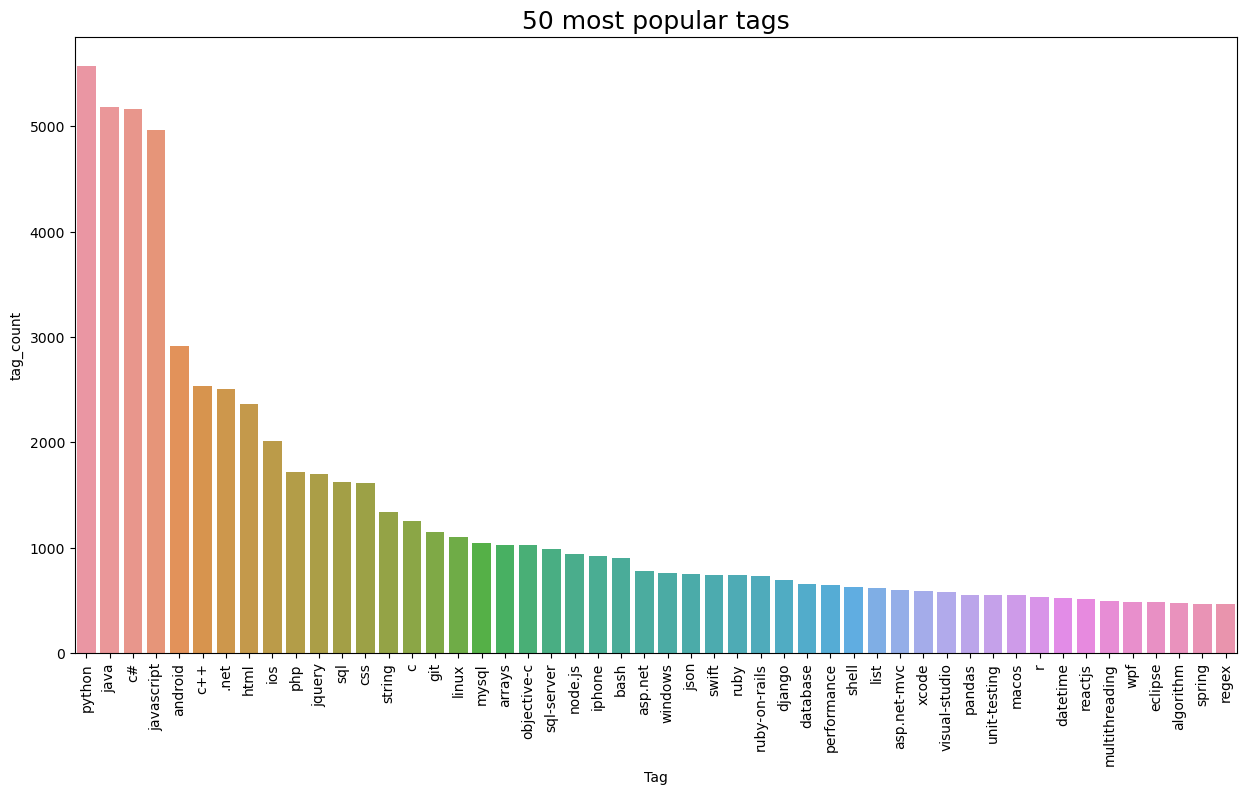

In [21]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=tags_list.iloc[0:50, :],
            x=tags_list.iloc[0:50, :].index,
            y="tag_count")
plt.xticks(rotation=90)
plt.title("50 most popular tags",
          fontsize=18)
plt.show()

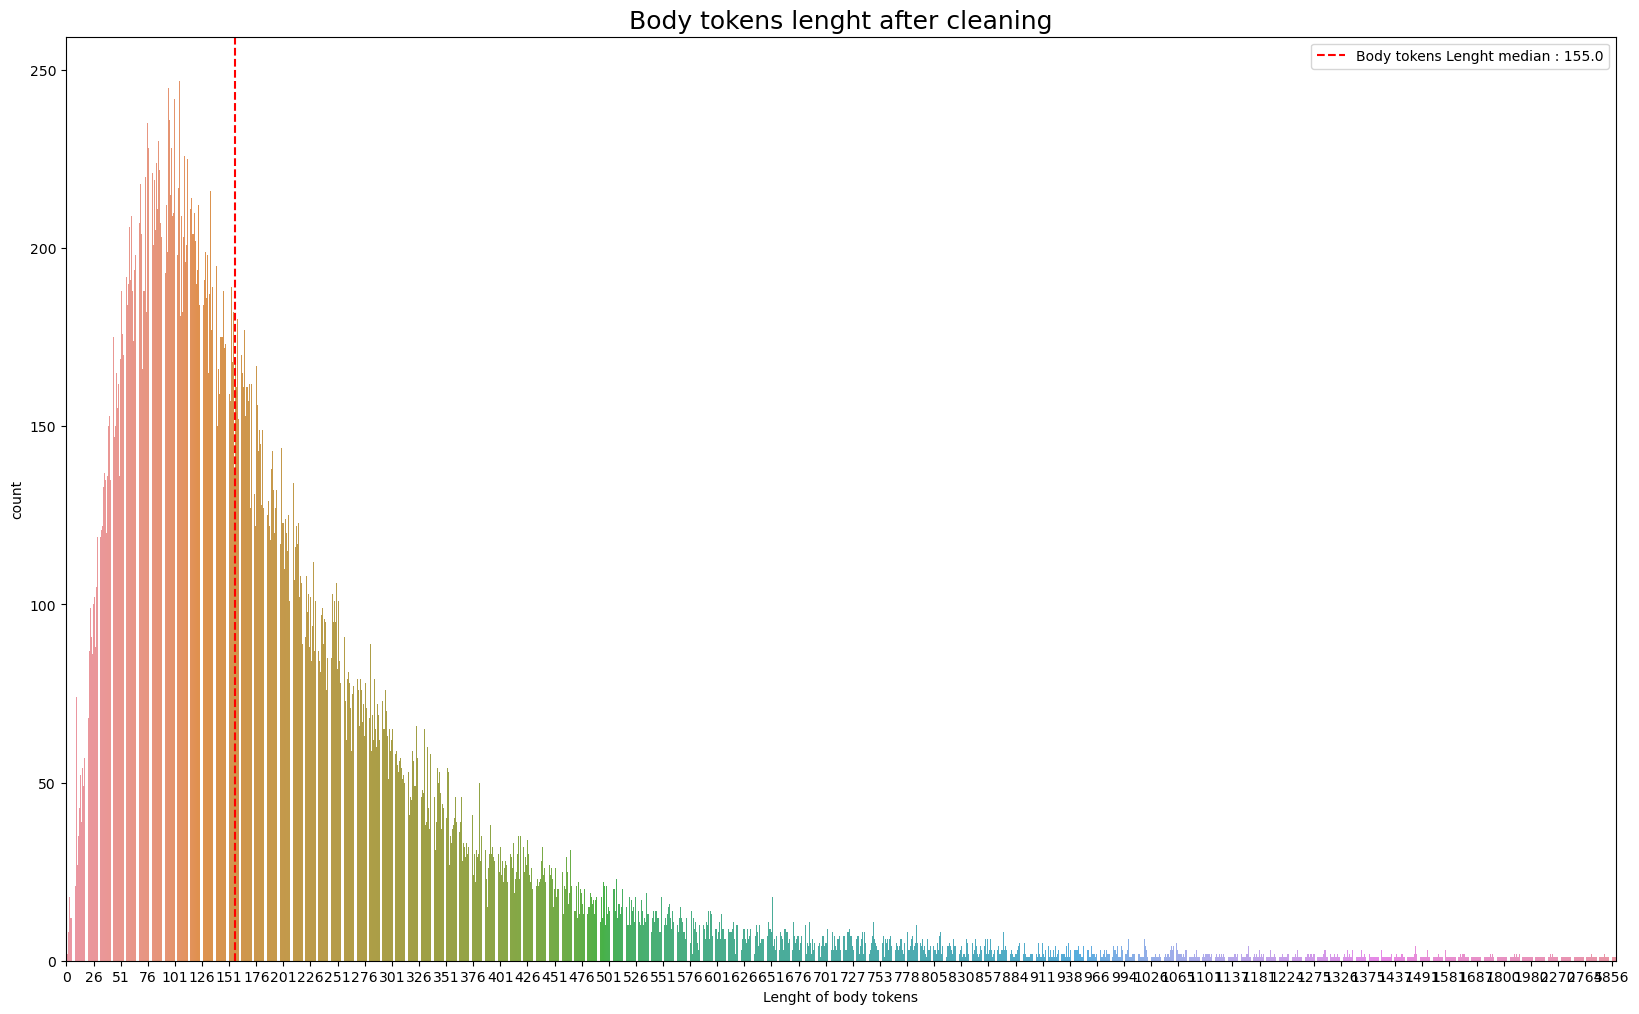

In [22]:
# Calculate lenght of each list in Body
data['body_tokens_count'] = [len(_) for _ in data.Body_cleaned]

# Countplot of body lenght
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=data.body_tokens_count)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 25))
plot_median = data.body_tokens_count.median()
plt.axvline(plot_median - data.body_tokens_count.min(),
            color="r", linestyle='--',
            label="Body tokens Lenght median : "+str(plot_median))
ax.set_xlabel("Lenght of body tokens")
plt.title("Body tokens lenght after cleaning",
          fontsize=18)
plt.legend()
plt.show()

### Feature Engineering

Filtre sur les 50 tags les plus communs

In [23]:
def filter_tag(x, top_list):
    temp_list = []
    for item in x:
        if (item in top_list):
            #x.remove(item)
            temp_list.append(item)
    return temp_list

In [24]:
data['Tags_list'] = data['Tags'].str.split(',')
data['Tags_list'] = data['Tags_list']\
                    .apply(lambda x: filter_tag(x, top_tags))
data['number_of_tags'] = data['Tags_list'].apply(lambda x : len(x))
data = data[data.number_of_tags > 0]
print("New size of dataset : {} questions.".format(data.shape[0]))

New size of dataset : 43910 questions.


In [25]:
data

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount,Body_cleaned,Title_cleaned,body_tokens_count,Tags_list,number_of_tags
0,How to make a <button> in Bootstrap look like ...,I'm working in (formerly Twitter) Bootstrap 2 ...,"html,css,twitter-bootstrap",19981949,124,160740,0.0,8,working formerly twitter bootstrap style butto...,make button bootstrap look like normal link,155,"[html, css]",2
1,How do i exit a List<string>.ForEach loop when...,In a normal loop you can break out of a loop u...,"c#,loops,delegates",557159,51,73947,0.0,12,normal loop break loop break done anonymous de...,exit loop anonymous delegate,213,[c#],1
2,NULL vs nil in Objective-C,In - why do the docs use instead of when no...,"objective-c,cocoa,null",557582,191,97079,0.0,5,doc use instead context pointer,null v nil,31,[objective-c],1
4,How do I add an existing Solution to GitHub fr...,I have looked through many web pages on the ne...,"git,github,visual-studio-2013",19982053,214,158522,0.0,9,many web page new git integration v deal solut...,add solution visual studio,129,[git],1
5,"Java IO implementation of unix/linux ""tail -f""",I'm wondering what techniques and/or library t...,"java,file,file-io,iostream,tail",557844,76,81370,0.0,9,wondering technique library use implement func...,io implementation tail f,220,[java],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,React Input Element : Value vs Default Value,When I render an input element within my compo...,"javascript,reactjs,frontend",42807901,55,141668,0.0,4,render input element within component set elem...,react input element value v default value,238,"[javascript, reactjs]",2
49996,How do you set the text in an NSTextField?,"I'm trying to set the text in an NSTextField, ...","cocoa,macos,nstextfield",2841559,150,85985,0.0,7,trying set text method working idea,set text,35,[macos],1
49997,Knowing when AVPlayer object is ready to play,I'm trying to play an file that is passed to ...,"iphone,avfoundation,audio-streaming,avplayer",5401437,90,95050,0.0,10,trying play file previous variable print figur...,knowing object ready play,302,[iphone],1
49998,How to post data to specific URL using WebClie...,"I need to use ""HTTP Post"" with WebClient to po...","c#,post,webclient",5401501,349,560372,0.0,9,need use post post data specific know accompli...,post data specific c,126,[c#],1


In [26]:
data = data[['Id','Body_cleaned','Title_cleaned','Tags_list']]

In [27]:
data["Full_text"] = data["Title_cleaned"]+[' ']+data["Body_cleaned"]

C:\Users\ctripie\AppData\Local\Temp\ipykernel_7840\1027059790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Full_text"] = data["Title_cleaned"]+[' ']+data["Body_cleaned"]


In [28]:
data.head(10)

,Id,Body_cleaned,Title_cleaned,Tags_list,Full_text
0,19981949,working formerly twitter bootstrap style butto...,make button bootstrap look like normal link,"[html, css]",make button bootstrap look like normal link wo...
1,557159,normal loop break loop break done anonymous de...,exit loop anonymous delegate,[c#],exit loop anonymous delegate normal loop break...
2,557582,doc use instead context pointer,null v nil,[objective-c],null v nil doc use instead context pointer
4,19982053,many web page new git integration v deal solut...,add solution visual studio,[git],add solution visual studio many web page new g...
5,557844,wondering technique library use implement func...,io implementation tail f,[java],io implementation tail f wondering technique l...
6,557959,string equal date number millisecond since epo...,convert millisecond date,"[php, datetime]",convert millisecond date string equal date num...
7,558122,question plain c function c method comment und...,static function c,[c],static function c question plain c function c ...
9,19982257,scattered around still clear difference usage ...,render v outlet v partial v view v control,[javascript],render v outlet v partial v view v control sca...
10,556771,get example used necessary want disabled whole...,c warning restore,[c#],c warning restore get example used necessary w...
11,556775,difference attribute property instead member v...,attribute property v member,[.net],attribute property v member difference attribu...


In [29]:
data["Full_text"][0]

'make button bootstrap look like normal link working formerly twitter bootstrap style button though normal link normal link though going container markup end like bootstrap way make look like actually'

In [30]:
data.to_csv("C:/Users/ctripie/Documents/OPC/Projet 5/TextClean.csv",index=False)